In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
import os
os.environ["KAGGLE_CONFIG_DIR"] = "/content/drive/MyDrive/Colab Notebooks"

In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks'

/content/drive/MyDrive/Colab Notebooks


In [ ]:
!pwd

/content/drive/MyDrive/Colab Notebooks


In [ ]:
!kaggle datasets download -d bmadushanirodrigo/x-ray-and-non-x-ray-image-classification-data

Dataset URL: https://www.kaggle.com/datasets/bmadushanirodrigo/x-ray-and-non-x-ray-image-classification-data
License(s): CC0-1.0
100% 99.7M/99.7M [00:01<00:00, 81.3MB/s]
100% 99.7M/99.7M [00:01<00:00, 68.1MB/s]


In [ ]:
!ls

kaggle.json	  seg_pred  seg_train	 x-ray-and-non-x-ray-image-classification-data.zip
ResNet50V2.ipynb  seg_test  VGG19.ipynb


In [ ]:
!unzip \*.zip && rm *.zip

Archive:  x-ray-and-non-x-ray-image-classification-data.zip
  inflating: README.txt              
  inflating: Xray_Classifier/Xray_Classifier/test/non_xray/151_jpg.rf.e6d46ebc767d19c98bb223583d70e957.jpg  
  inflating: Xray_Classifier/Xray_Classifier/test/non_xray/152_jpg.rf.6c72c05afe65b4e76a5abb8f0c85f1b3.jpg  
  inflating: Xray_Classifier/Xray_Classifier/test/non_xray/153_jpg.rf.38496cc12465301867a77b1c900cd9bb.jpg  
  inflating: Xray_Classifier/Xray_Classifier/test/non_xray/154_jpeg.rf.2f4887d7e810d71d451d738848fd9f08.jpg  
  inflating: Xray_Classifier/Xray_Classifier/test/non_xray/155_jpg.rf.99d227084d779d2630050819e56f78f0.jpg  
  inflating: Xray_Classifier/Xray_Classifier/test/non_xray/156_jpg.rf.4f3e35af33b0341b6f11f8e8e08a19a7.jpg  
  inflating: Xray_Classifier/Xray_Classifier/test/non_xray/157_jpg.rf.162db3beb5dec6368827a0b438a3cf82.jpg  
  inflating: Xray_Classifier/Xray_Classifier/test/non_xray/158_jpg.rf.1207fdf8b3c48c55f216c02da89256b3.jpg  
  inflating: Xray_Classifier/

In [2]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [3]:
train_path = "/content/drive/MyDrive/Colab Notebooks/Xray_Classifier/Xray_Classifier/train/"
test_path = "/content/drive/MyDrive/Colab Notebooks/Xray_Classifier/Xray_Classifier/val/"

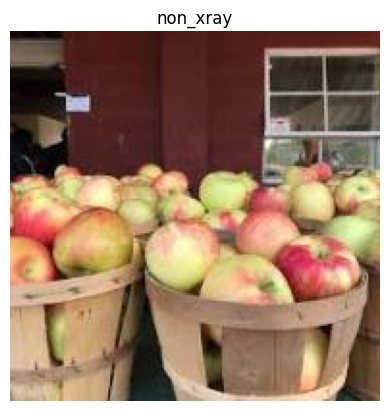

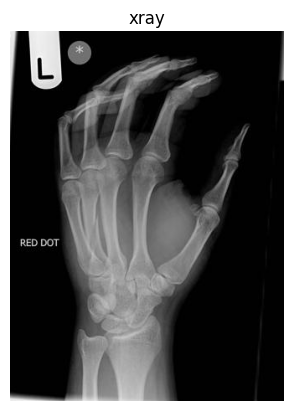

In [4]:
import os

for i in os.listdir(train_path):
    for j in os.listdir(train_path + i):
        img = load_img(train_path + i + "/" + j)
        plt.imshow(img)
        plt.title(i)
        plt.axis("off")
        plt.show()
        break

In [5]:
train_data = ImageDataGenerator(rescale= 1./255, shear_range = 0.2, zoom_range= 0.1, horizontal_flip= True)
test_data = ImageDataGenerator(rescale = 1./255)

In [6]:
train_datagen = train_data.flow_from_directory(train_path,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               color_mode = "rgb",
                                               class_mode = "categorical")

Found 1185 images belonging to 2 classes.


In [7]:
test_datagen = test_data.flow_from_directory(test_path,
                                             target_size = (224,224),
                                             batch_size =32,
                                             color_mode = "rgb",
                                             class_mode = "categorical")

Found 1185 images belonging to 2 classes.


In [8]:
model = ResNet50V2(weights = 'imagenet', include_top = False, input_shape = (224, 224, 3))
resnet = model.output
resnet = GlobalAveragePooling2D()(resnet)
resnet = Dropout(0.41)(resnet)
predictions = Dense(2, activation = "softmax")(resnet)
ResNet50_V2 = Model(inputs = model.input, outputs = predictions)

94668760/94668760 [==============================] - 1s 0us/step


In [9]:
adam = Adam(learning_rate=0.001)
ResNet50_V2.compile(optimizer = adam, loss = "categorical_crossentropy", metrics = ["accuracy"])

In [10]:
history = ResNet50_V2.fit( train_datagen,epochs = 5, validation_data= test_datagen, batch_size = 32)

Epoch 1/5
38/38 [==============================] - 1057s 27s/step - loss: 0.1248 - accuracy: 0.9553 - val_loss: 42.3913 - val_accuracy: 0.5873
Epoch 2/5
38/38 [==============================] - 868s 23s/step - loss: 0.0390 - accuracy: 0.9890 - val_loss: 20.9873 - val_accuracy: 0.5300
Epoch 3/5
38/38 [==============================] - 867s 23s/step - loss: 0.0708 - accuracy: 0.9882 - val_loss: 77096.2109 - val_accuracy: 0.4759
Epoch 4/5
38/38 [==============================] - 868s 23s/step - loss: 0.0868 - accuracy: 0.9848 - val_loss: 326.4865 - val_accuracy: 0.5443
Epoch 5/5
38/38 [==============================] - 865s 23s/step - loss: 0.0337 - accuracy: 0.9941 - val_loss: 5.3347 - val_accuracy: 0.7308


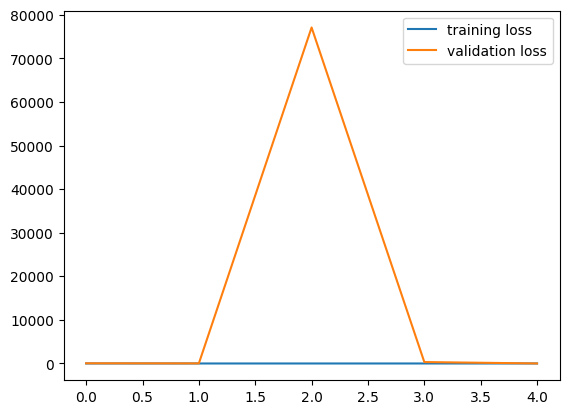

In [12]:
plt.plot(history.history["loss"], label="training loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.legend()
plt.show()


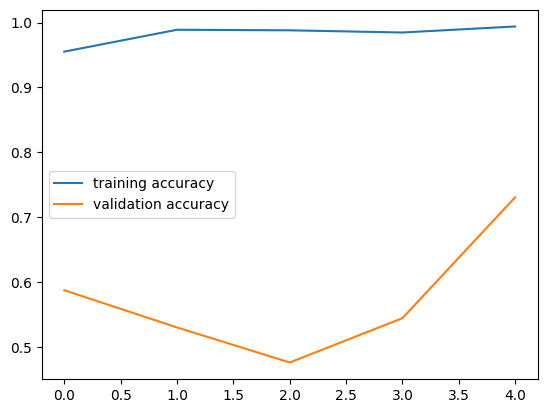

In [13]:
plt.plot(history.history["accuracy"], label = "training accuracy")
plt.plot(history.history["val_accuracy"], label = "validation accuracy")
plt.legend()
plt.show()